# Artistic Movement Color Evolution

## Introduction

Art history is a story of changing visual languages. From the dark, dramatic palettes of the Baroque to the vibrant explosions of Fauvism, **color usage has evolved dramatically** across artistic movements.

In this lesson, we'll computationally trace how color choices evolved across major art movements.

### What You'll Learn

- How to group artworks by artistic movement/style
- Timeline visualization of color trends
- Statistical comparison across movements
- Identifying color "revolutions" in art history

### Key Movements We'll Analyze

1. **Renaissance** (1400-1600): Classical balance, naturalistic colors
2. **Baroque** (1600-1750): Dramatic contrasts, rich darks
3. **Romanticism** (1780-1850): Emotional, atmospheric
4. **Impressionism** (1860-1890): Light, bright, visible brushwork
5. **Post-Impressionism** (1886-1905): Bold, expressive
6. **Expressionism** (1905-1920): Emotional, distorted
7. **Abstract** (1910+): Non-representational, pure color

Let's trace the evolution of color!

## Setup

In [3]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorAnalyzer, ColorVisualizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

# Initialize
artist_analyzer = ArtistAnalyzer()
color_extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()
visualizer = ColorVisualizer()

# Load dataset
print("Loading WikiArt dataset...")
dataset = artist_analyzer._load_dataset()
print(f"Loaded {len(dataset)} artworks")

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

Loading WikiArt dataset...
Loading WikiArt dataset...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✓ Loaded 81444 artworks
Loaded 81444 artworks


## Part 1: Exploring Art Movements in WikiArt

In [4]:
# Get style/movement information
if hasattr(dataset, 'features') and 'style' in dataset.features:
    style_feature = dataset.features['style']
    if hasattr(style_feature, 'names'):
        style_names = style_feature.names
        print(f"Found {len(style_names)} art styles/movements:\n")
        
        # Display in columns
        for i in range(0, len(style_names), 3):
            row = style_names[i:i+3]
            print("  ".join(f"{i+j}: {name[:30]}" for j, name in enumerate(row)))

Found 27 art styles/movements:

0: Abstract_Expressionism  1: Action_painting  2: Analytical_Cubism
3: Art_Nouveau  4: Baroque  5: Color_Field_Painting
6: Contemporary_Realism  7: Cubism  8: Early_Renaissance
9: Expressionism  10: Fauvism  11: High_Renaissance
12: Impressionism  13: Mannerism_Late_Renaissance  14: Minimalism
15: Naive_Art_Primitivism  16: New_Realism  17: Northern_Renaissance
18: Pointillism  19: Pop_Art  20: Post_Impressionism
21: Realism  22: Rococo  23: Romanticism
24: Symbolism  25: Synthetic_Cubism  26: Ukiyo_e


## Part 2: Extract Works by Movement

In [5]:
def extract_works_by_style(dataset, style_name, limit=20):
    """
    Extract artworks from a specific artistic movement/style.
    """
    style_names = dataset.features['style'].names
    
    # Find matching style
    target_idx = None
    for idx, name in enumerate(style_names):
        if style_name.lower() in name.lower():
            target_idx = idx
            print(f"Found: '{name}' (index {idx})")
            break
    
    if target_idx is None:
        print(f"Style '{style_name}' not found")
        return []
    
    works = []
    for item in dataset:
        if item['style'] == target_idx:
            works.append(item)
            if len(works) >= limit:
                break
    
    print(f"Extracted {len(works)} works")
    return works

# Test
test_works = extract_works_by_style(dataset, 'impressionism', limit=5)

Found: 'Impressionism' (index 12)
Extracted 5 works


## Part 3: Analyze Color Evolution Across Movements

In [6]:
# Define movements to analyze (in rough chronological order)
movements = [
    ('renaissance', 'Renaissance'),
    ('baroque', 'Baroque'),
    ('romanticism', 'Romanticism'),
    ('impressionism', 'Impressionism'),
    ('post-impressionism', 'Post-Impressionism'),
    ('expressionism', 'Expressionism'),
    ('abstract', 'Abstract')
]

# Collect color data for each movement
movement_colors = {}
movement_stats = {}

for style_key, style_name in movements:
    print(f"\n{'='*50}")
    print(f"Analyzing {style_name}")
    print('='*50)
    
    works = extract_works_by_style(dataset, style_key, limit=15)
    
    if not works:
        continue
    
    all_colors = []
    for work in works:
        try:
            palette = color_extractor.extract_dominant_colors(work['image'], n_colors=5)
            all_colors.extend(palette)
        except:
            pass
    
    if all_colors:
        movement_colors[style_name] = all_colors
        
        # Compute stats
        stats = color_analyzer.analyze_palette_statistics(all_colors)
        temp = color_analyzer.analyze_color_temperature_distribution(all_colors)
        
        movement_stats[style_name] = {
            'saturation': stats['mean_saturation'],
            'brightness': stats['mean_value'],
            'warm_pct': temp['warm_percentage'],
            'cool_pct': temp['cool_percentage'],
            'diversity': color_analyzer.calculate_color_diversity(all_colors),
            'n_colors': len(all_colors)
        }
        print(f"  Extracted {len(all_colors)} colors")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)


Analyzing Renaissance
Found: 'Early_Renaissance' (index 8)
Extracted 15 works
  Extracted 75 colors

Analyzing Baroque
Found: 'Baroque' (index 4)
Extracted 15 works
  Extracted 75 colors

Analyzing Romanticism
Found: 'Romanticism' (index 23)
Extracted 15 works
  Extracted 75 colors

Analyzing Impressionism
Found: 'Impressionism' (index 12)
Extracted 15 works
  Extracted 75 colors

Analyzing Post-Impressionism
Style 'post-impressionism' not found

Analyzing Expressionism
Found: 'Abstract_Expressionism' (index 0)
Extracted 15 works
  Extracted 75 colors

Analyzing Abstract
Found: 'Abstract_Expressionism' (index 0)
Extracted 15 works
  Extracted 75 colors

ANALYSIS COMPLETE


## Part 4: Visualize Color Evolution Timeline

In [ ]:
# Create evolution visualization
if movement_stats:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    movements_order = [m[1] for m in movements if m[1] in movement_stats]
    x = list(range(len(movements_order)))
    
    # 1. Saturation Evolution
    ax = axes[0, 0]
    sats = [movement_stats[m]['saturation'] for m in movements_order]
    ax.plot(x, sats, 'o-', linewidth=2, markersize=10, color='#9b59b6')
    ax.fill_between(x, sats, alpha=0.3, color='#9b59b6')
    ax.set_xticks(x)
    ax.set_xticklabels(movements_order, rotation=45, ha='right')
    ax.set_ylabel('Mean Saturation (%)')
    ax.set_title('Saturation Evolution Across Movements', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # 2. Brightness Evolution
    ax = axes[0, 1]
    brights = [movement_stats[m]['brightness'] for m in movements_order]
    ax.plot(x, brights, 'o-', linewidth=2, markersize=10, color='#f39c12')
    ax.fill_between(x, brights, alpha=0.3, color='#f39c12')
    ax.set_xticks(x)
    ax.set_xticklabels(movements_order, rotation=45, ha='right')
    ax.set_ylabel('Mean Brightness (%)')
    ax.set_title('Brightness Evolution Across Movements', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # 3. Warm vs Cool Evolution
    ax = axes[1, 0]
    warm = [movement_stats[m]['warm_pct'] for m in movements_order]
    cool = [movement_stats[m]['cool_pct'] for m in movements_order]
    ax.plot(x, warm, 'o-', linewidth=2, markersize=10, color='#ff6b6b', label='Warm')
    ax.plot(x, cool, 'o-', linewidth=2, markersize=10, color='#4ecdc4', label='Cool')
    ax.fill_between(x, warm, alpha=0.2, color='#ff6b6b')
    ax.fill_between(x, cool, alpha=0.2, color='#4ecdc4')
    ax.set_xticks(x)
    ax.set_xticklabels(movements_order, rotation=45, ha='right')
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Color Temperature Evolution', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. Color Diversity Evolution
    ax = axes[1, 1]
    divs = [movement_stats[m]['diversity'] for m in movements_order]
    bars = ax.bar(x, divs, color=plt.cm.viridis(np.linspace(0, 1, len(movements_order))))
    ax.set_xticks(x)
    ax.set_xticklabels(movements_order, rotation=45, ha='right')
    ax.set_ylabel('Color Diversity Score')
    ax.set_title('Color Diversity by Movement', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.grid(axis='y', alpha=0.3)
    
    plt.suptitle('Color Evolution Across Art Movements', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## Part 5: Movement Color Palettes Comparison

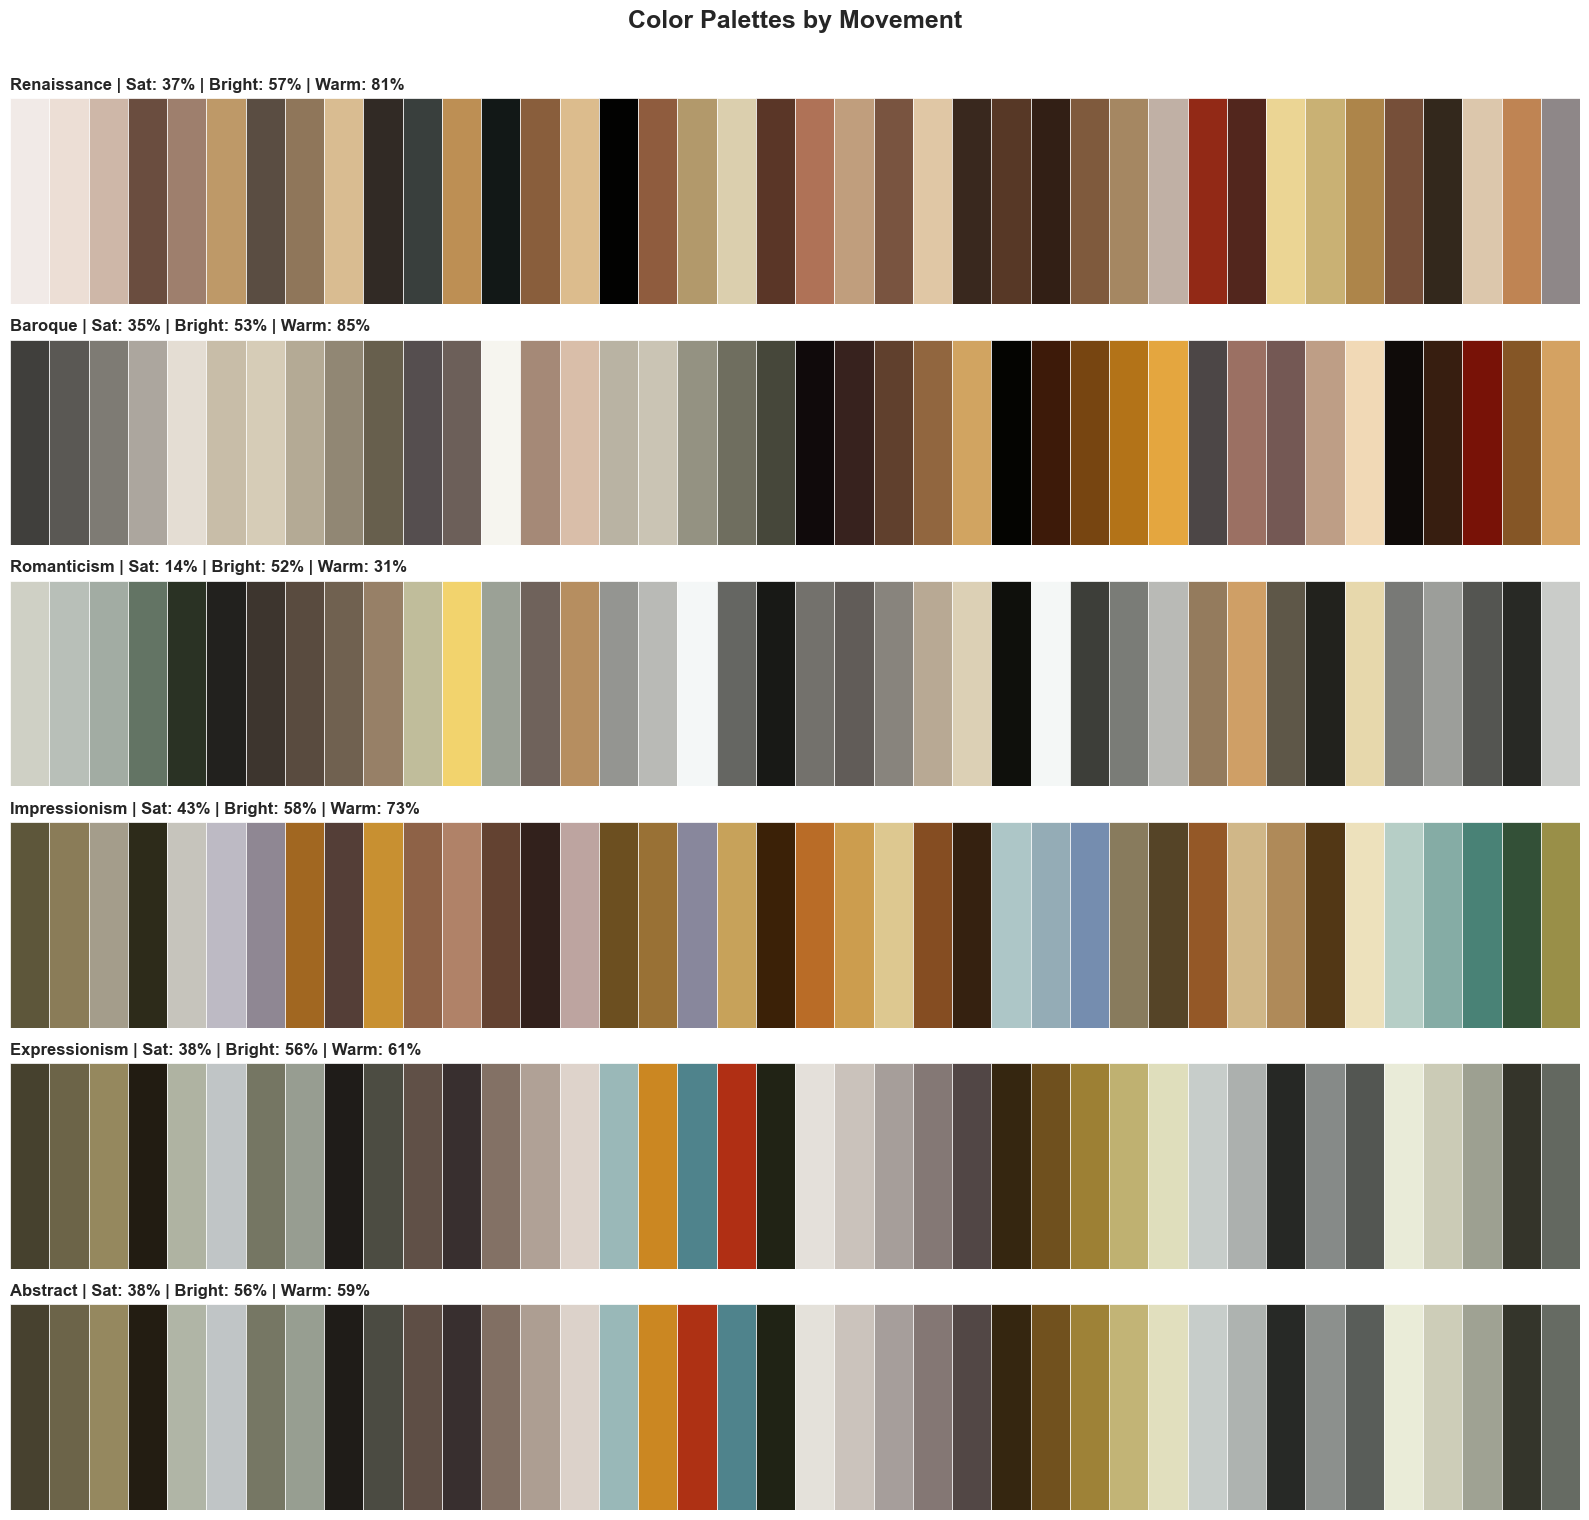

In [8]:
# Visualize color palettes for each movement
if movement_colors:
    n_movements = len(movement_colors)
    fig, axes = plt.subplots(n_movements, 1, figsize=(16, 2.5 * n_movements))
    
    if n_movements == 1:
        axes = [axes]
    
    for ax, (movement, colors) in zip(axes, movement_colors.items()):
        sample = colors[:40] if len(colors) > 40 else colors
        colors_norm = [(r/255, g/255, b/255) for r, g, b in sample]
        
        for i, color in enumerate(colors_norm):
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='white', lw=0.5))
        
        ax.set_xlim(0, len(colors_norm))
        ax.set_ylim(0, 1)
        ax.axis('off')
        
        stats = movement_stats[movement]
        ax.set_title(f"{movement} | Sat: {stats['saturation']:.0f}% | Bright: {stats['brightness']:.0f}% | Warm: {stats['warm_pct']:.0f}%",
                    fontsize=12, fontweight='bold', loc='left')
    
    plt.suptitle('Color Palettes by Movement', fontsize=18, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.show()

## Part 6: Key Observations and Historical Context

### Historical Color Trends

1. **Renaissance → Baroque**: Move toward darker, more dramatic palettes
2. **Baroque → Romanticism**: Emotional, atmospheric colors
3. **Romanticism → Impressionism**: Revolutionary brightness increase!
4. **Impressionism → Post-Impressionism**: Bolder saturation
5. **Post-Impressionism → Expressionism**: Emotional color distortion
6. **Expressionism → Abstract**: Pure color exploration

### Why These Changes?

- **Pigment availability**: New synthetic pigments in 19th century
- **Painting location**: Impressionists painted outdoors (plein air)
- **Artistic philosophy**: From representation to expression
- **Scientific influence**: Color theory development

In [ ]:
# Create summary table
if movement_stats:
    summary_df = pd.DataFrame(movement_stats).T
    summary_df = summary_df.round(1)
    summary_df.columns = ['Saturation', 'Brightness', 'Warm %', 'Cool %', 'Diversity', 'Colors']
    
    print("\n" + "="*80)
    print("COLOR EVOLUTION SUMMARY")
    print("="*80)
    print(summary_df.to_string())
    print("\n")

## Exercise: Analyze Your Own Movement Comparison

In [ ]:
# YOUR CODE HERE
# Try comparing:
# - 'cubism' vs 'surrealism'
# - 'realism' vs 'abstract-expressionism'
# - 'art-nouveau' vs 'art-deco'



---

## Conclusion

You've learned to:
- Extract artworks by artistic movement
- Visualize color evolution across time
- Identify major color "revolutions" in art history
- Connect technical color analysis to historical context

**Key Insight**: Art history's major transitions often involved radical changes in color usage—particularly the Impressionist revolution in brightness and outdoor color!